In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, RidgeClassifier,ElasticNet

from sklearn.preprocessing import MinMaxScaler,StandardScaler


import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# 1.Problem statement

To predict car prise using various features

# 2.Data Gathering

In [2]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# 3.EDA - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.shape


(205, 26)

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.head(1).T

,0
symboling,3
normalized-losses,?
make,alfa-romero
fuel-type,gas
aspiration,std
num-of-doors,two
body-style,convertible
drive-wheels,rwd
engine-location,front
wheel-base,88.6


In [7]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [9]:
df['normalized-losses'].replace({'?':np.nan},inplace= True)

In [10]:
df['normalized-losses']

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [11]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [12]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [13]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [15]:
df['num-of-doors'].replace({'?':np.nan},inplace = True)

In [16]:
df['num-of-doors'].value_counts()


four    114
two      89
Name: num-of-doors, dtype: int64

In [17]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [18]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [19]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [20]:
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [21]:
df['wheel-base'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

In [22]:
df['length'].value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: length, Length: 75, dtype: int64

In [23]:
df['length'].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [24]:
df['width'].value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: width, dtype: int64

In [25]:
df['height'].value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: height, dtype: int64

In [26]:
df['curb-weight'].value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curb-weight, Length: 171, dtype: int64

In [27]:
df['curb-weight'].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [28]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [29]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [30]:
df['engine-size'].value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: engine-size, dtype: int64

In [31]:
df.head(1).T

,0
symboling,3
normalized-losses,NaN
make,alfa-romero
fuel-type,gas
aspiration,std
num-of-doors,two
body-style,convertible
drive-wheels,rwd
engine-location,front
wheel-base,88.6


In [32]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [33]:
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [34]:
df['bore'].replace({"?":np.nan},inplace = True)

In [35]:
df['stroke'].value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [36]:
df['stroke'].replace({"?":np.nan},inplace = True)

In [37]:
df['compression-ratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compression-ratio, dtype: int64

In [38]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [39]:
df['horsepower'].replace({"?":np.nan})

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [40]:
df['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [41]:
df['peak-rpm'].replace({"?":np.nan},inplace = True)

In [42]:
df['city-mpg'].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64

In [43]:
df['highway-mpg'].value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64

In [44]:
df['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [45]:
df['price'].replace({"?":np.nan},inplace = True)

In [46]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [47]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## 1.handling missing value

In [48]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [49]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [50]:
df['normalized-losses'].isna().sum()

41

In [51]:
df['normalized-losses']= df['normalized-losses'].astype(float)

In [52]:
df['normalized-losses'].dtype

dtype('float64')

In [53]:
df['normalized-losses'].mean()

122.0

In [54]:
df['normalized-losses'].median()

115.0

In [55]:
df['normalized-losses'].mode()

0    161.0
Name: normalized-losses, dtype: float64

In [56]:
df['normalized-losses'].isna().mean() * 100

20.0

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

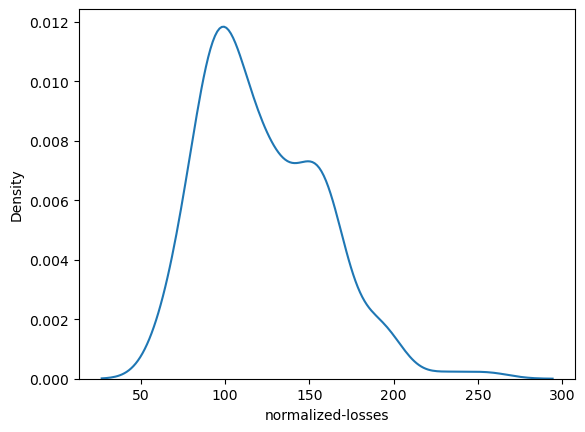

In [57]:
sns.kdeplot(df['normalized-losses'])

In [58]:
#df['normalized-losses']  = df['normalized-losses'].fillna(df['normalized-losses'].mean())

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

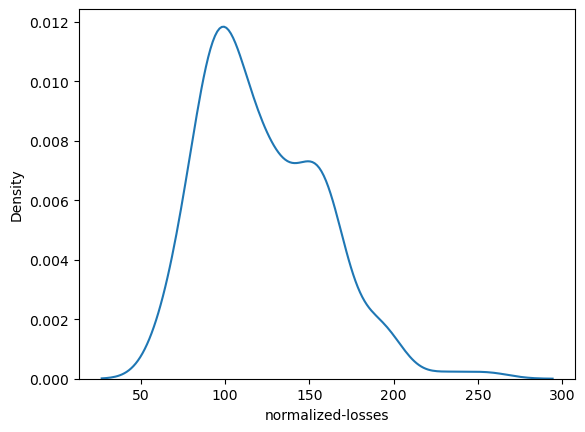

In [59]:
sns.kdeplot(df['normalized-losses'])

In [60]:
# 20% missing values in normalized-losses
# tried imutting values with mean the distribution is not normal
# that reason shifting to knn-imputer

In [61]:
df['normalized-losses'].isna().sum()

41

In [62]:
#knn_imputer = KNNImputer(n_neighbors=3)
#array = knn_imputer.fit_transform(df['normalized-losses'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [64]:
df.head(1).T

,0
symboling,3
normalized-losses,NaN
make,alfa-romero
fuel-type,gas
aspiration,std
num-of-doors,two
body-style,convertible
drive-wheels,rwd
engine-location,front
wheel-base,88.6


In [65]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [66]:
df['make'].sort_values

<bound method Series.sort_values of 0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object>

In [67]:
# 1st we sort the column alphabetacaly then sort the assign value 

In [68]:
label_enc = LabelEncoder()
arr = label_enc.fit_transform(df['make'])
df['make'] = pd.Series(arr)

In [69]:
df['make']

0       0
1       0
2       0
3       1
4       1
       ..
200    21
201    21
202    21
203    21
204    21
Name: make, Length: 205, dtype: int32

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [71]:
df['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [72]:
df['fuel-type'].replace({'gas': 1, 'diesel': 2},inplace = True)

In [73]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [74]:
df['aspiration'].replace({'std': 0, 'turbo': 1},inplace =True)

In [75]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [76]:
df['num-of-doors'].replace({'two':2,"four":4},inplace = True)

In [77]:
df['num-of-doors'].isna().sum()

2

In [78]:
df['num-of-doors'].mean()

3.123152709359606

In [79]:
df['num-of-doors'].median()

4.0

In [80]:
df['num-of-doors'].mode()

0    4.0
Name: num-of-doors, dtype: float64

In [81]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].median())

In [82]:
df['num-of-doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
200    4.0
201    4.0
202    4.0
203    4.0
204    4.0
Name: num-of-doors, Length: 205, dtype: float64

In [83]:
df['body-style'].value_counts().to_dict()

{'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6}

In [84]:
df['body-style'].replace({'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4, 'convertible': 5},inplace = True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [86]:
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,2.0,5,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,0,1,0,2.0,5,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,0,1,0,2.0,2,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,1,1,0,4.0,1,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,1,1,0,4.0,1,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,4.0,1,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95.0,21,1,1,4.0,1,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95.0,21,1,0,4.0,1,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95.0,21,2,1,4.0,1,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [87]:
df['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [88]:
df['drive-wheels'] # fwd ->front wheel drive,rear wheel drive,4 wheel drive - all tier

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object

In [89]:
df['drive-wheels'].isna().sum()

0

In [90]:
df['drive-wheels'].replace({'fwd': 1, 'rwd': 2, '4wd': 3},inplace = True)

In [91]:
df['drive-wheels']

0      2
1      2
2      2
3      1
4      3
      ..
200    2
201    2
202    2
203    2
204    2
Name: drive-wheels, Length: 205, dtype: int64

In [92]:
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [93]:
df['engine-location'].replace({'front': 1, 'rear': 2},inplace=True)

In [94]:
df['wheel-base'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheel-base, dtype: int64

In [95]:
df['wheel-base'].isna().sum()

0

In [96]:
df['engine-type'].value_counts().to_dict()

{'ohc': 148,
 'ohcf': 15,
 'ohcv': 13,
 'dohc': 12,
 'l': 12,
 'rotor': 4,
 'dohcv': 1}

In [97]:
df['engine-type'].replace({'ohc': 1,'ohcf': 2,'ohcv': 3,'dohc': 4,'l': 5,'rotor': 6,'dohcv': 7},inplace = True)

In [98]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [99]:
df['num-of-cylinders'].replace({'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12},inplace = True)

In [100]:
df['fuel-system'].value_counts().to_dict()

{'mpfi': 94,
 '2bbl': 66,
 'idi': 20,
 '1bbl': 11,
 'spdi': 9,
 '4bbl': 3,
 'mfi': 1,
 'spfi': 1}

In [101]:
df['fuel-system'].replace({'mpfi': 1,
 '2bbl': 2,
 'idi': 3,
 '1bbl': 4,
 'spdi': 5,
 '4bbl': 6,
 'mfi': 7,
 'spfi': 8},inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [103]:
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: bore, dtype: int64

In [104]:
df['bore'].isna().sum()

4

In [105]:
df['bore']=  df['bore'].astype(float)

In [106]:
df['bore'].mean()

3.3297512437810957

In [107]:
df['bore'].median()

3.31

In [108]:
df['bore'].mode()

0    3.62
Name: bore, dtype: float64

In [109]:
df['bore'] = df['bore'].fillna(df['bore'].median())

In [110]:
df['bore'].isna().sum()

0

In [111]:
df['stroke'] = df['stroke'].astype(float)

In [112]:
df['stroke'].mean()

3.2554228855721337

In [113]:
df['stroke'].mode()

0    3.4
Name: stroke, dtype: float64

In [114]:
df['stroke'].median()

3.29

In [115]:
df['stroke'] = df['stroke'].fillna(df['stroke'].median())

In [116]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [117]:
df['horsepower'].replace({"?":np.nan},inplace = True)

In [118]:
df['horsepower'] = df['horsepower'].astype(float)

In [119]:
df['horsepower'].mean()

104.25615763546799

In [120]:
df['horsepower'].mode()

0    68.0
Name: horsepower, dtype: float64

In [121]:
df['horsepower'].median()

95.0

In [122]:
df['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [123]:
df['peak-rpm'] = df['peak-rpm'].astype(float)

In [124]:
df['peak-rpm'].mean()

5125.369458128079

In [125]:
df['peak-rpm'].median()

5200.0

In [126]:
df['peak-rpm'].mode()

0    5500.0
Name: peak-rpm, dtype: float64

In [127]:
df['price'].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [128]:
 df['price'] =df['price'].astype(float)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    int32  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [130]:
df['normalized-losses'].isna().sum()

41

In [131]:
df['normalized-losses']

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [132]:
knn_imputer = KNNImputer(n_neighbors=3)
array = knn_imputer.fit_transform(df)

In [133]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,0,1,0,2.0,5,2,1,88.6,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,0,1,0,2.0,5,2,1,88.6,...,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,0,1,0,2.0,2,2,1,94.5,...,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,4.0,1,1,1,99.8,...,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,4.0,1,3,1,99.4,...,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,4.0,1,2,1,109.1,...,141,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,21,1,1,4.0,1,2,1,109.1,...,141,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,21,1,0,4.0,1,2,1,109.1,...,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,21,2,1,4.0,1,2,1,109.1,...,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [134]:
df = pd.DataFrame(array,columns  = df.columns)

In [135]:
df1 = df

In [136]:
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,127.0,0.0,1.0,0.0,2.0,5.0,2.0,1.0,88.6,...,130.0,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,144.0,0.0,1.0,0.0,2.0,5.0,2.0,1.0,88.6,...,130.0,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,144.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0,94.5,...,152.0,1.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,99.8,...,109.0,1.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,1.0,1.0,0.0,4.0,1.0,3.0,1.0,99.4,...,136.0,1.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,21.0,1.0,0.0,4.0,1.0,2.0,1.0,109.1,...,141.0,1.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,21.0,1.0,1.0,4.0,1.0,2.0,1.0,109.1,...,141.0,1.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,21.0,1.0,0.0,4.0,1.0,2.0,1.0,109.1,...,173.0,1.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,21.0,2.0,1.0,4.0,1.0,2.0,1.0,109.1,...,145.0,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [137]:
df1.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.575610,12.195122,1.097561,0.180488,3.131707,1.819512,1.458537,1.014634,98.756585,...,126.907317,1.990244,3.329366,3.256098,10.142537,104.276423,5124.634146,25.219512,30.751220,13260.333333
std,1.245307,32.480015,6.274831,0.297446,0.385535,0.993715,0.990944,0.581148,0.120377,6.021776,...,41.642693,1.306058,0.270858,0.313634,3.972040,39.520086,477.519050,6.542142,6.886443,8008.336561
min,-2.000000,65.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,86.600000,...,61.000000,1.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,8.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,120.666667,12.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,97.000000,...,120.000000,2.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,144.000000,19.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1.000000,102.400000,...,141.000000,2.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,21.000000,2.000000,1.000000,4.000000,5.000000,3.000000,2.000000,120.900000,...,326.000000,8.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    float64
 4   aspiration         205 non-null    float64
 5   num-of-doors       205 non-null    float64
 6   body-style         205 non-null    float64
 7   drive-wheels       205 non-null    float64
 8   engine-location    205 non-null    float64
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    float64
 15  num-of-cylinders   205 non-null    float64
 16  engine-size        205 non

In [139]:
# continuous ->normalized-losses,wheel-base,length,width,height,curb-weight ,engine-type, bore,stroke,compression-ratio,
# horsepower,peak-rpm,city-mpg ,highway-mpg
# categorical ->symboling,make,fuel-type,aspiration,num-of-doors,body-style,engine-location,body-style,drive-wheels,
# engine-location,engine-type,num-of-cylinders,fuel-system

# Splitting Data

In [140]:
x = df1.drop('price',axis = 1)
y = df1['price']

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=11)


In [142]:
x_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
52,1.0,104.000000,8.0,1.0,0.0,2.0,2.0,1.0,1.0,93.1,...,4.0,91.0,2.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
178,3.0,197.000000,19.0,1.0,0.0,2.0,2.0,2.0,1.0,102.9,...,6.0,171.0,1.0,3.27,3.35,9.3,161.0,5200.0,20.0,24.0
30,2.0,137.000000,5.0,1.0,0.0,2.0,2.0,1.0,1.0,86.6,...,4.0,92.0,4.0,2.91,3.41,9.6,58.0,4800.0,49.0,54.0
63,0.0,86.333333,8.0,2.0,0.0,4.0,1.0,1.0,1.0,98.8,...,4.0,122.0,3.0,3.39,3.39,22.7,64.0,4650.0,36.0,42.0
147,0.0,89.000000,18.0,1.0,0.0,4.0,3.0,1.0,1.0,97.0,...,4.0,108.0,1.0,3.62,2.64,9.0,94.0,5200.0,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,3.0,153.000000,11.0,1.0,0.0,2.0,2.0,1.0,1.0,96.3,...,4.0,122.0,2.0,3.35,3.46,8.5,88.0,5000.0,25.0,32.0
91,1.0,128.000000,12.0,1.0,0.0,2.0,1.0,1.0,1.0,94.5,...,4.0,97.0,2.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
80,3.0,153.000000,11.0,1.0,1.0,2.0,2.0,1.0,1.0,96.3,...,4.0,110.0,5.0,3.17,3.46,7.5,116.0,5500.0,23.0,30.0
191,0.0,87.333333,20.0,1.0,0.0,4.0,1.0,1.0,1.0,100.4,...,5.0,136.0,1.0,3.19,3.40,8.5,110.0,5500.0,19.0,24.0


In [143]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [144]:
y_pred = lin_reg.predict(x_test)

y_pred[20:30]

array([21642.34314539,  9722.28775106,  9477.26125953,  7555.02449831,
       12806.52891883, 20354.6790372 , 10748.67991406,  5805.83129333,
        8322.52176259, 36717.02760746])

In [145]:
y_test[20:30]

2      16500.0
184     7995.0
86      8189.0
141     7126.0
135    15510.0
179    15998.0
149    11694.0
121     6692.0
33      6529.0
126    32528.0
Name: price, dtype: float64

In [146]:
# testing data accuracy

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*50)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*50)

r2_val = r2_score(y_test,y_pred)
print("R2scored\n",r2_val)
print("*"*50)

MSE
 21427444.996651497
**************************************************
RMSE
 4628.9788287106585
**************************************************
MAE
 3096.824477875075
**************************************************
R2scored
 0.6488073618042061
**************************************************


In [147]:
# trainging data accuracy
y_pred_train = lin_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*50)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*50)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*50)

r2_val = r2_score(y_train,y_pred_train)
print("R2scored\n",r2_val)
print("*"*50)

MSE
 4696200.319794998
**************************************************
RMSE
 2167.071830788033
**************************************************
MAE
 1675.4527879494374
**************************************************
R2scored
 0.9272153255662532
**************************************************


# model is overfitting

## we use normalization and standerdization

In [148]:

#check outliers and treatment
# feature selection
# stad /normalization
# train_test_split
# regularization

# check outliers using IQR Method

<AxesSubplot:>

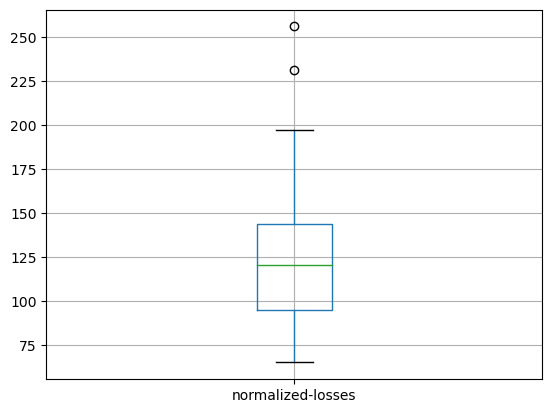

In [149]:
df1[['normalized-losses']].boxplot()

<AxesSubplot:>

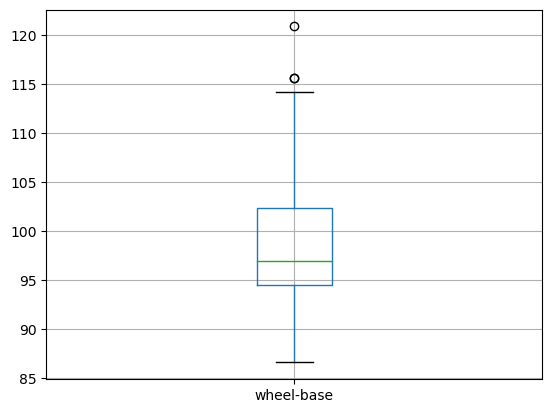

In [150]:
df1[['wheel-base']].boxplot()

<AxesSubplot:>

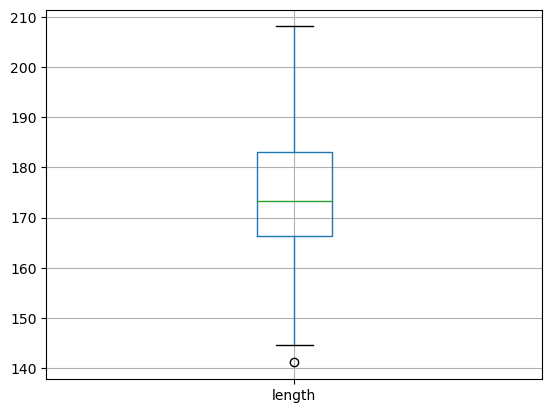

In [151]:
df1[['length']].boxplot()

<AxesSubplot:xlabel='width'>

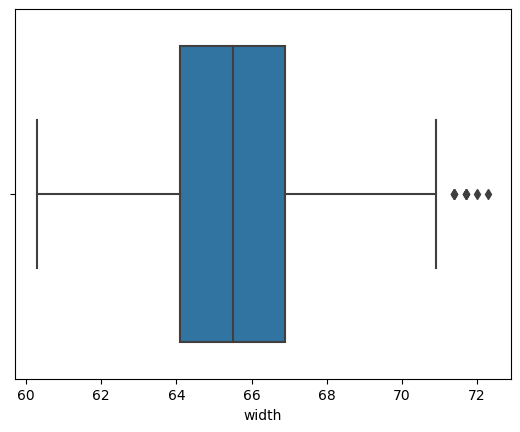

In [152]:
sns.boxplot(x = df['width'])

<AxesSubplot:xlabel='height'>

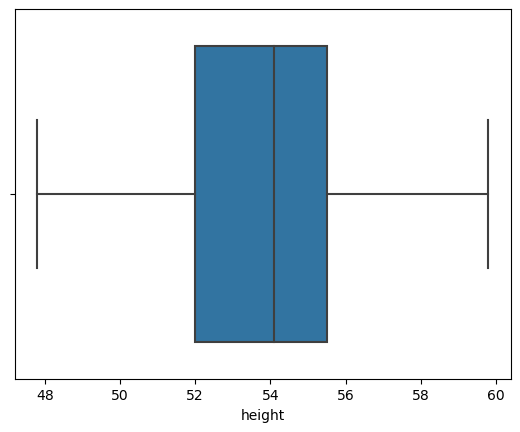

In [153]:
sns.boxplot(x = df['height'])

<AxesSubplot:xlabel='bore'>

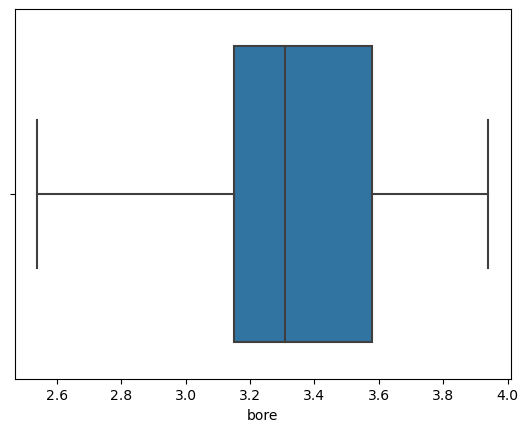

In [154]:
sns.boxplot(x = df['bore'])

<AxesSubplot:xlabel='stroke'>

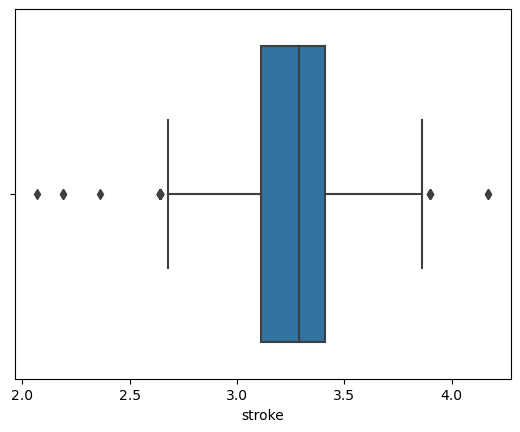

In [155]:
sns.boxplot(x = df['stroke'])

<AxesSubplot:xlabel='engine-type'>

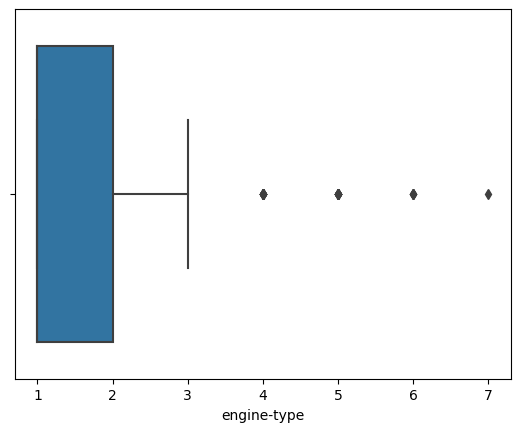

In [156]:
sns.boxplot(x = df['engine-type'])

#Assumptions of linear regression
1.Linearity
2.No Multicolinearity (VIF)

<Figure size 640x480 with 0 Axes>

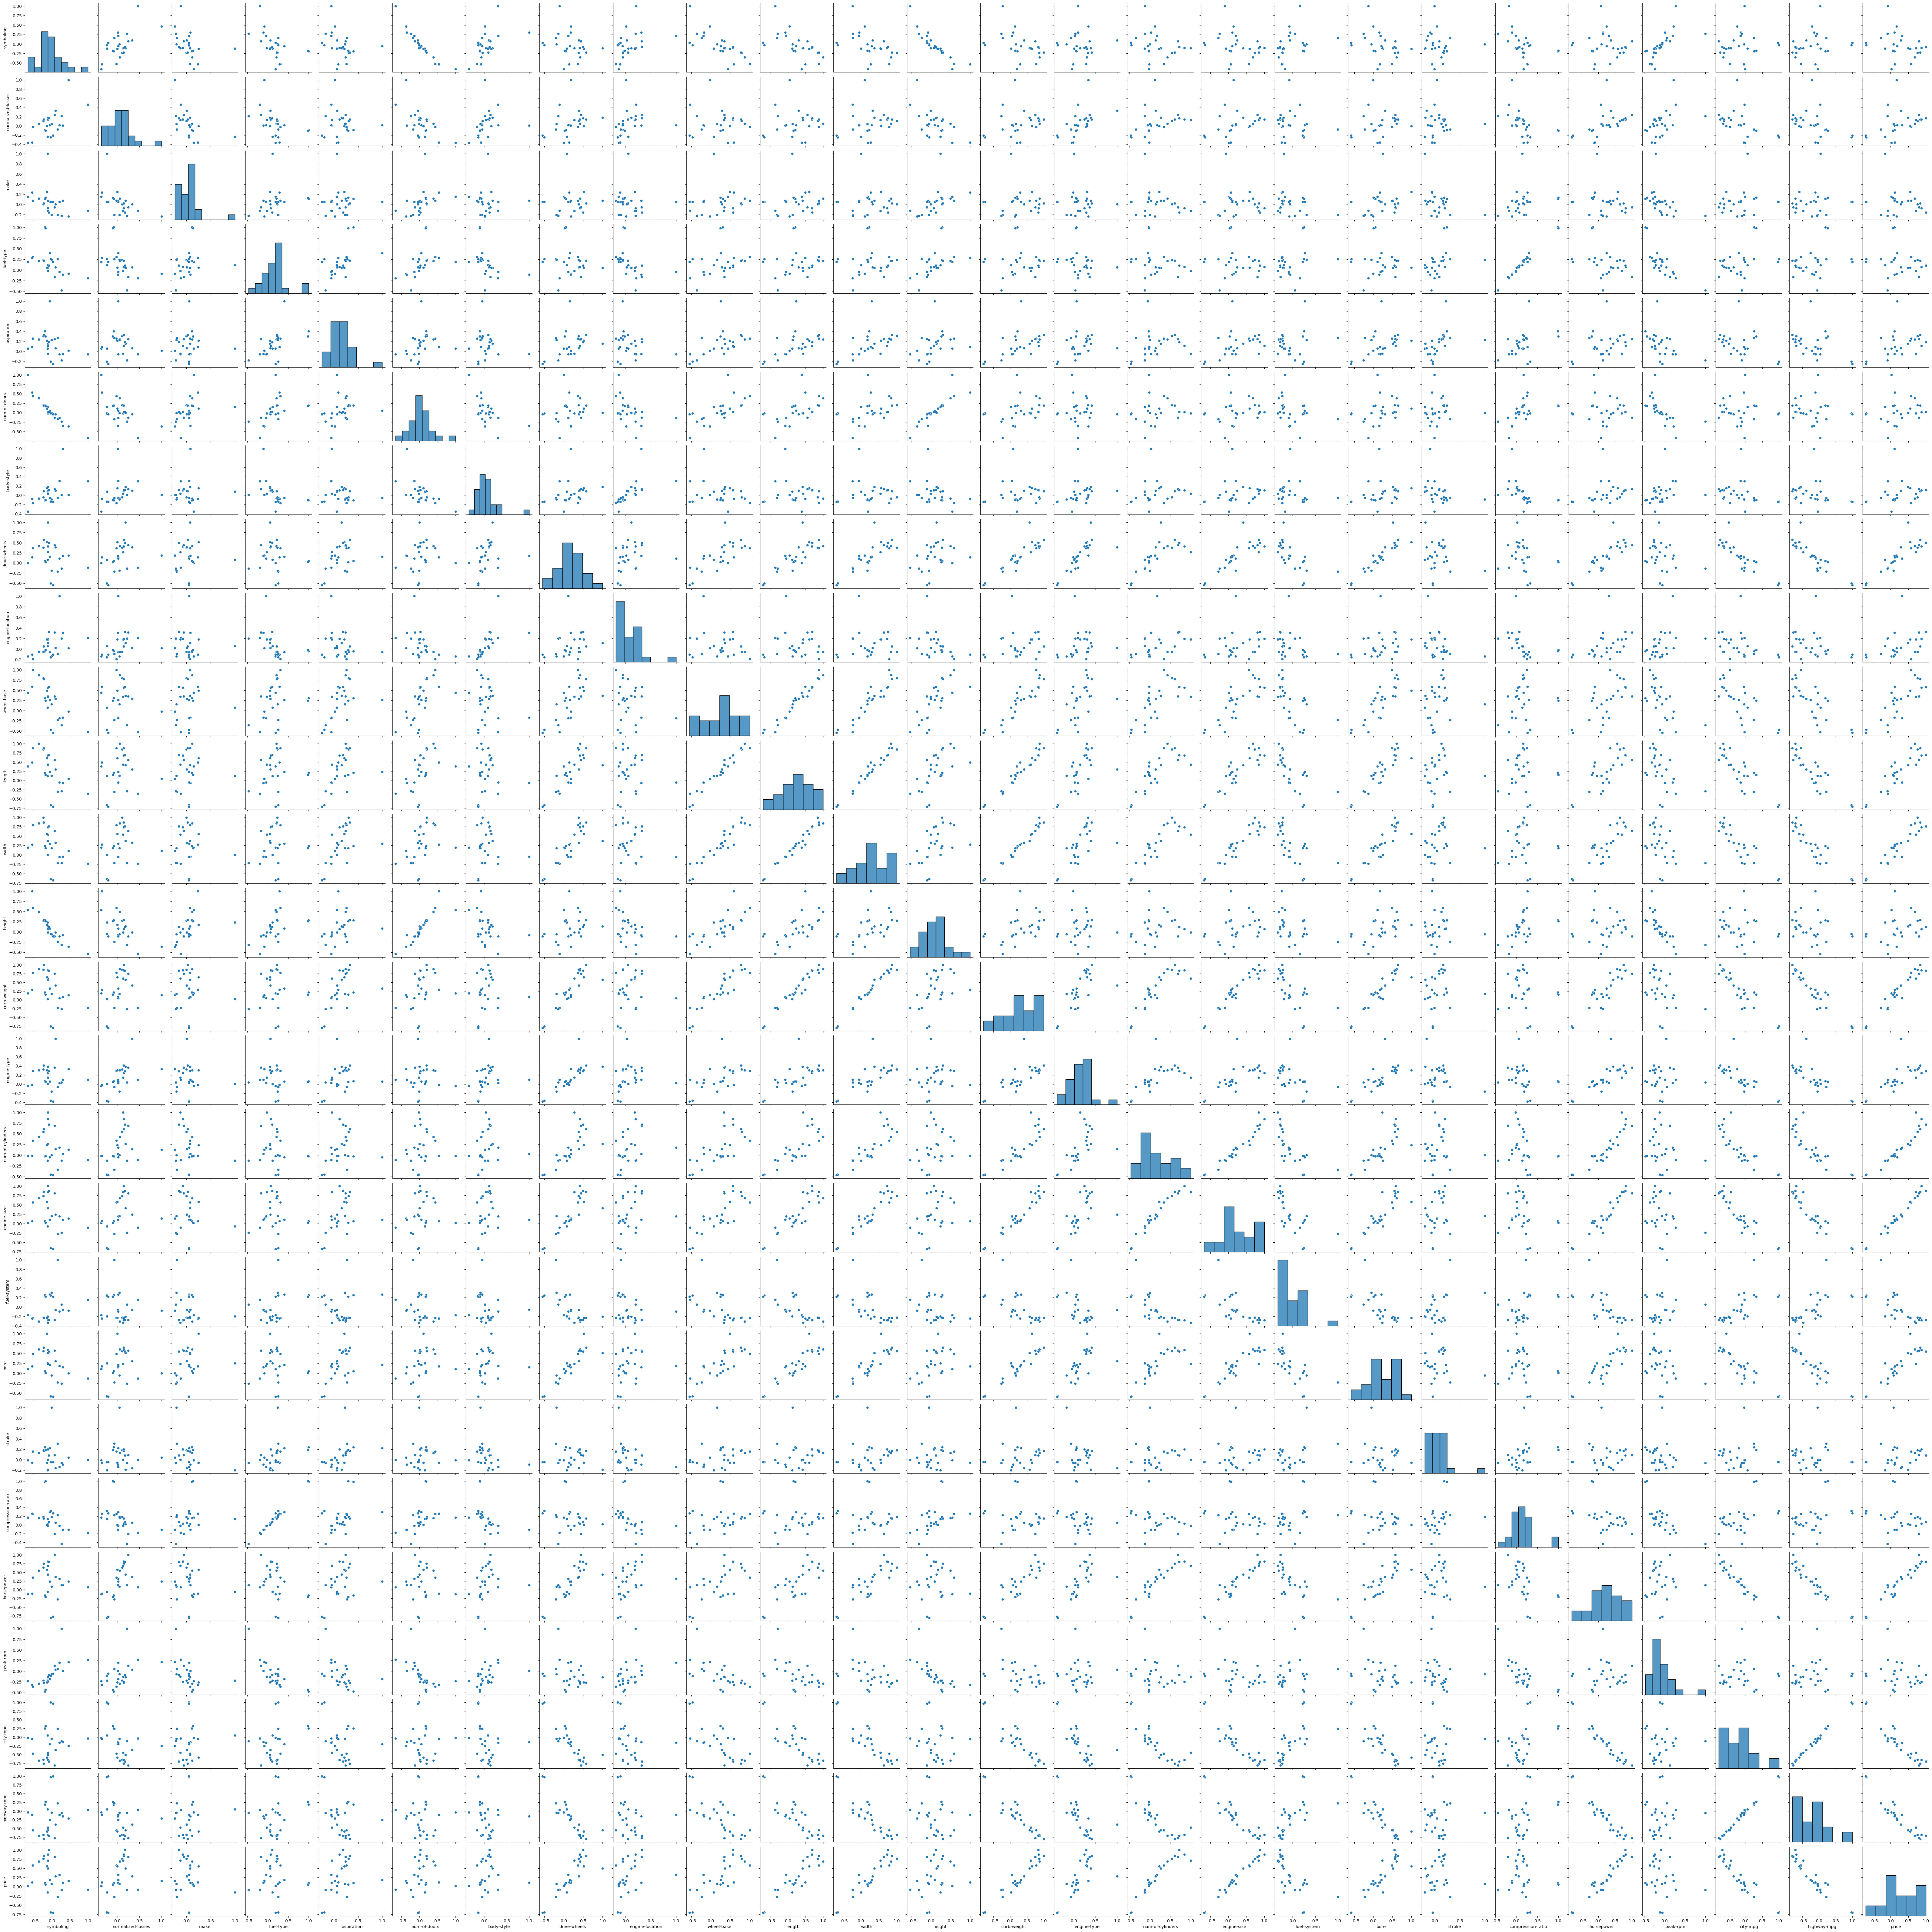

In [157]:
plt.savefig("linerity.png")
sns.pairplot(df1.corr())

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

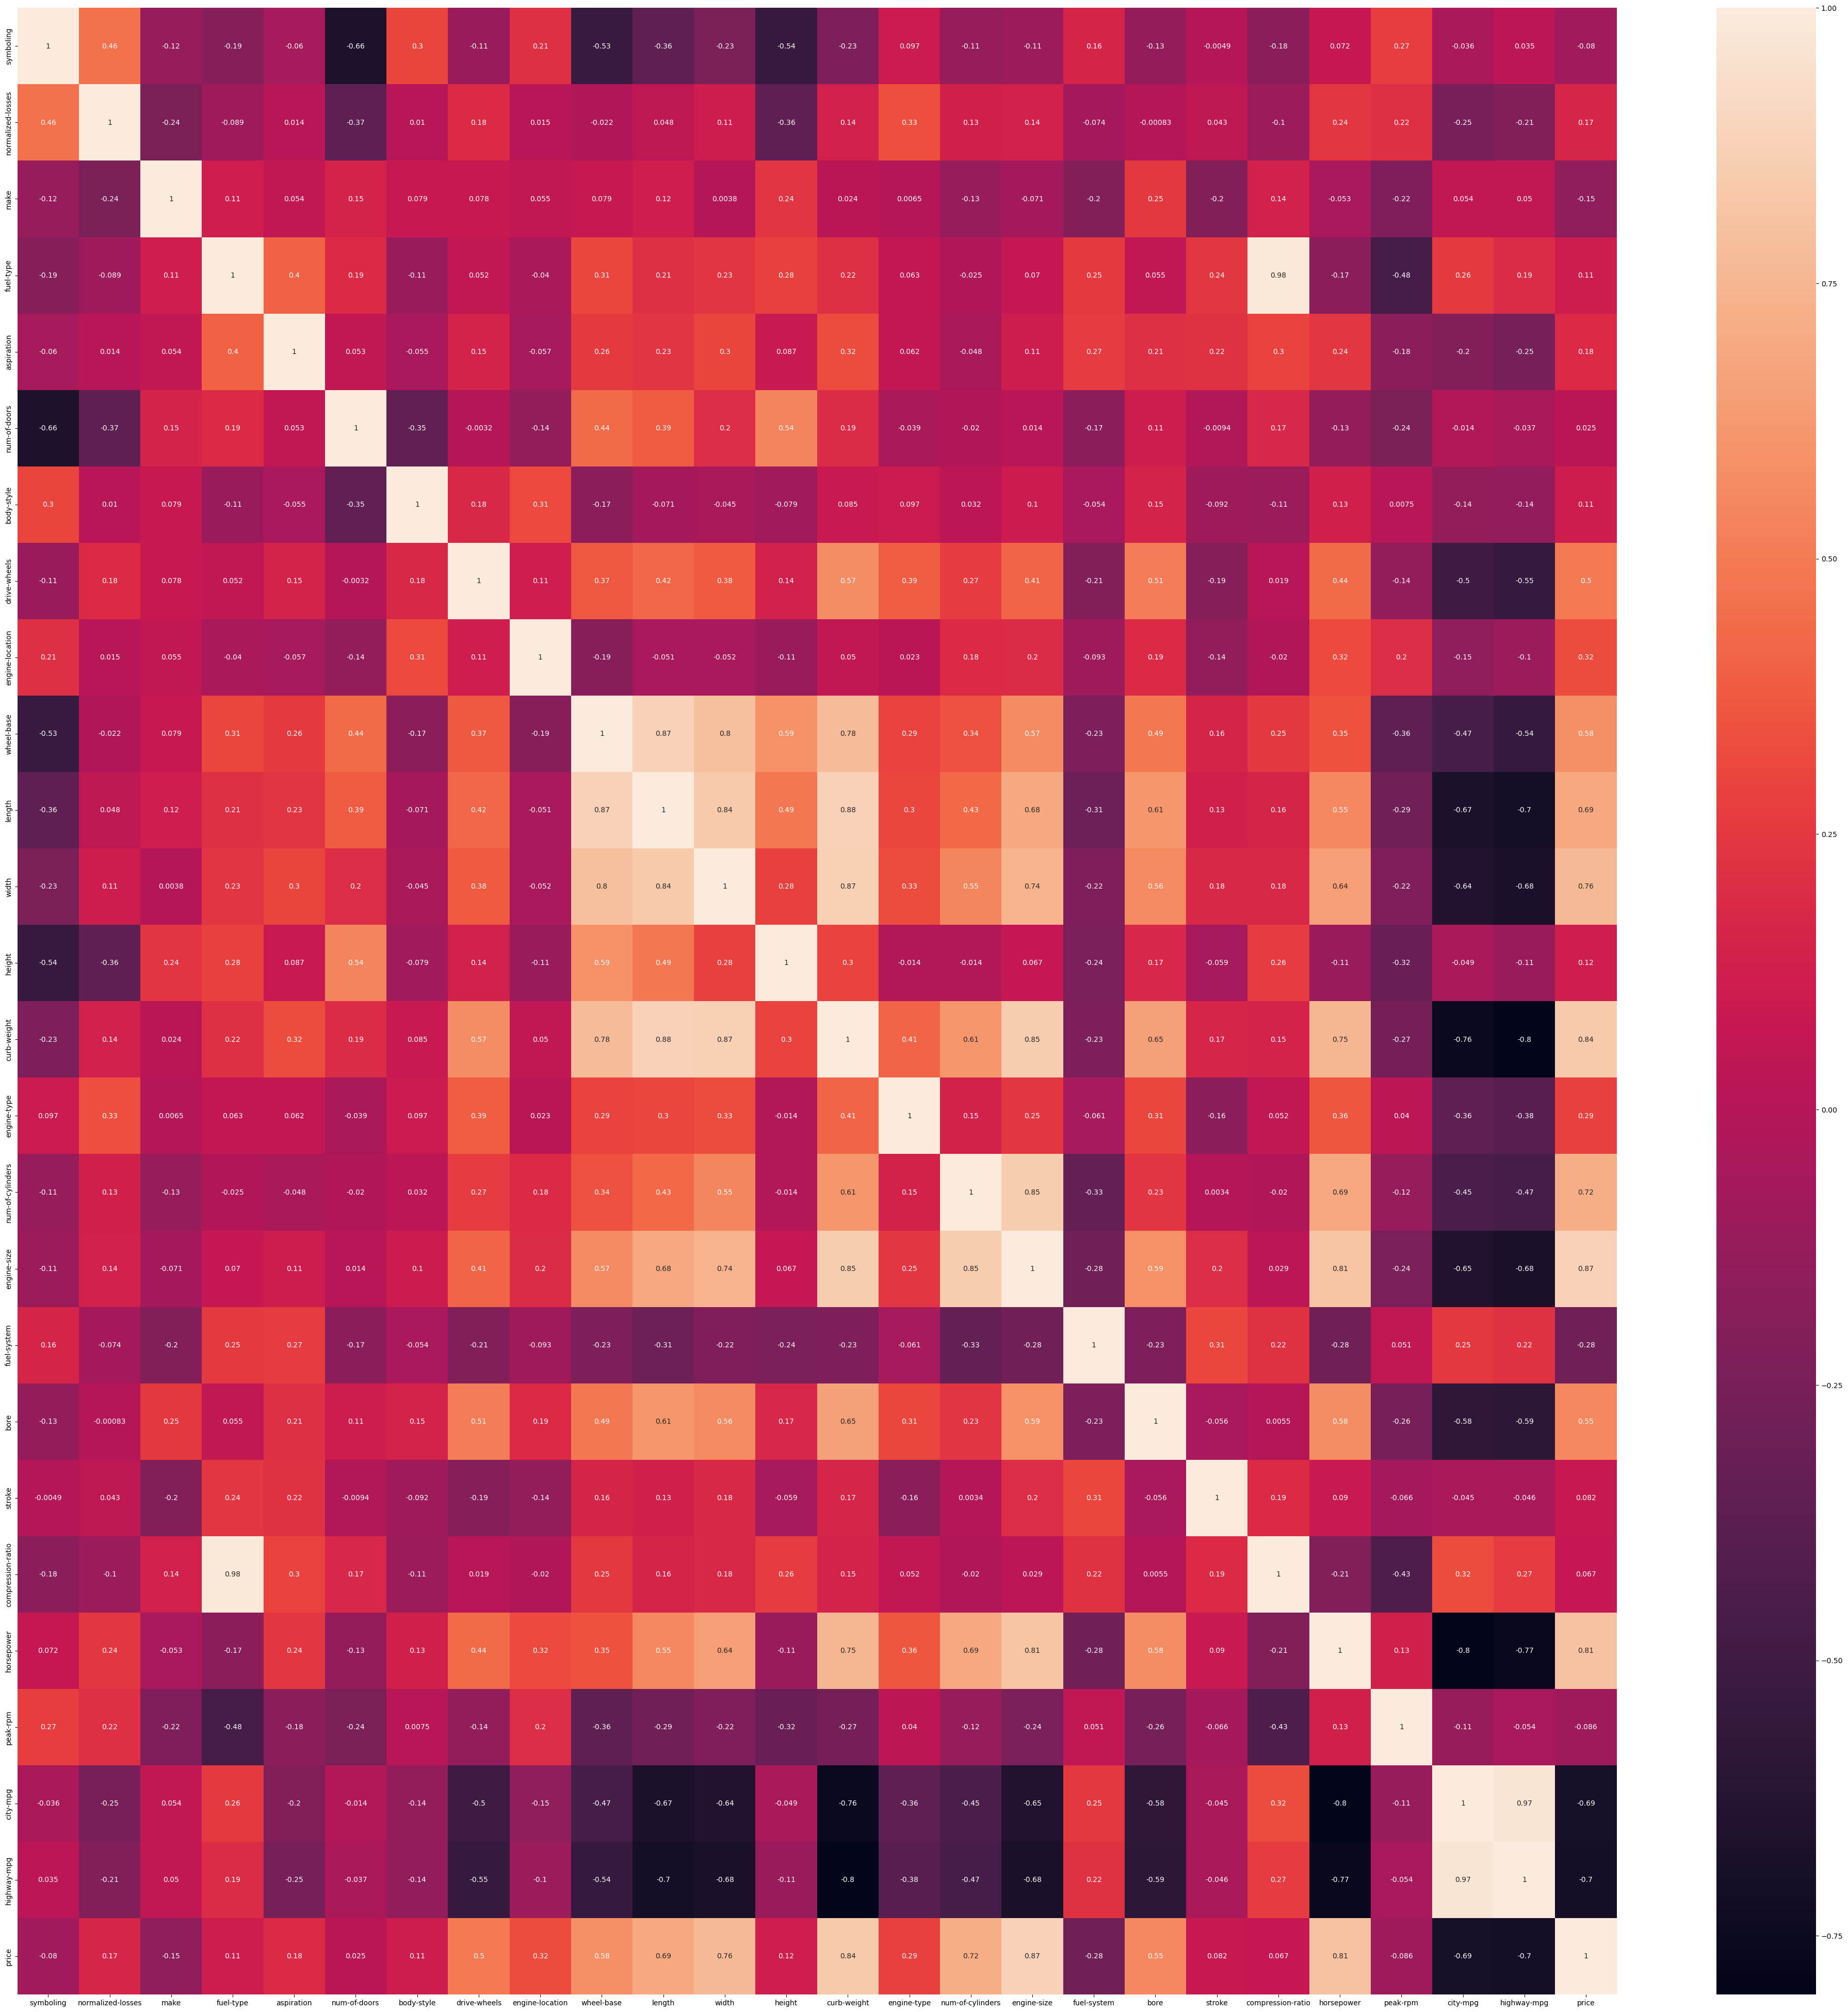

In [158]:
plt.savefig("autoset.png")
plt.figure(figsize=(50,50))
sns.heatmap(df1.corr(),annot = True)

In [159]:
df1.to_numpy()

array([[ 3.0000e+00,  1.2700e+02,  0.0000e+00, ...,  2.1000e+01,
         2.7000e+01,  1.3495e+04],
       [ 3.0000e+00,  1.4400e+02,  0.0000e+00, ...,  2.1000e+01,
         2.7000e+01,  1.6500e+04],
       [ 1.0000e+00,  1.4400e+02,  0.0000e+00, ...,  1.9000e+01,
         2.6000e+01,  1.6500e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]])

In [160]:
VIF_list =[]

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values,i)
    VIF_list.append(vif)
    
VIF_list    

[4.96020477876972,
 32.994188376828944,
 7.051837776106143,
 1437.0233758629915,
 4.631764605273769,
 29.336320141329857,
 7.261291391849908,
 16.986634872178783,
 127.87025537204947,
 2967.4164339333647,
 2368.9347133313727,
 4349.160586768809,
 1383.5747967749244,
 630.8772862949637,
 5.27425465328082,
 211.48012634151354,
 321.20781739942424,
 6.373423877850991,
 665.0170583352198,
 231.14463590677104,
 640.0063619028176,
 129.24968133548597,
 305.35511387701695,
 560.0322517526624,
 659.8044529955051]

In [161]:
s1 = pd.Series(VIF_list,index=x.columns)
s1.sort_values()

aspiration              4.631765
symboling               4.960205
engine-type             5.274255
fuel-system             6.373424
make                    7.051838
body-style              7.261291
drive-wheels           16.986635
num-of-doors           29.336320
normalized-losses      32.994188
engine-location       127.870255
horsepower            129.249681
num-of-cylinders      211.480126
stroke                231.144636
peak-rpm              305.355114
engine-size           321.207817
city-mpg              560.032252
curb-weight           630.877286
compression-ratio     640.006362
highway-mpg           659.804453
bore                  665.017058
height               1383.574797
fuel-type            1437.023376
length               2368.934713
wheel-base           2967.416434
width                4349.160587
dtype: float64

In [ ]:
s1 = pd.Series(VIF_list,index=df1.columns)
s1.sort_values().plot(kind = "barh")

In [163]:
df2 = df1.drop(['drive-wheels','make','body-style','fuel-system','engine-type','symboling','aspiration','num-of-doors'],axis = 1)

In [164]:
df2

,normalized-losses,fuel-type,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,127.0,1.0,1.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,144.0,1.0,1.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,144.0,1.0,1.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,1.0,1.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,1.0,1.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,1.0,1.0,109.1,188.8,68.9,55.5,2952.0,4.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,1.0,1.0,109.1,188.8,68.8,55.5,3049.0,4.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,1.0,1.0,109.1,188.8,68.9,55.5,3012.0,6.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,2.0,1.0,109.1,188.8,68.9,55.5,3217.0,6.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [165]:
df2.describe()

,normalized-losses,fuel-type,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,122.575610,1.097561,1.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329366,3.256098,10.142537,104.276423,5124.634146,25.219512,30.751220,13260.333333
std,32.480015,0.297446,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270858,0.313634,3.972040,39.520086,477.519050,6.542142,6.886443,8008.336561
min,65.000000,1.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,95.000000,1.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,120.666667,1.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,144.000000,1.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,256.000000,2.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
x1 = df2.drop('price',axis = 1)
y1 = df2['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=11)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train,y_train)

In [ ]:
y_pred = lin_reg2.predict(x_test)

In [ ]:
y_pred[10:15]

In [ ]:
y_test[10:15]

In [ ]:
# testing data accuracy

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = lin_reg2.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

# Normalization

In [ ]:
normal_scalar = MinMaxScaler()
normal_scalar.fit(x_train) # we are storing minimum and maximum values
array = normal_scalar.transform(x_train)

normal_train_xdf = pd.DataFrame(array,columns =x_train.columns )
normal_train_xdf.head(3)

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(normal_train_xdf,y_train)

In [ ]:
# training data accuracy
y_pred_train = lin_reg2.predict(normal_train_xdf)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
array = normal_scalar.transform(x_test)

normal_test_df = pd.DataFrame(array,columns = x_test.columns)
normal_test_df.head(3)

In [ ]:
# testing data accuracy
y_pred = lin_reg2.predict(normal_test_df)

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# trying to if model name is affecting

In [ ]:
normal_scalar1 = MinMaxScaler()
normal_scalar1.fit(x_train) # we are storing minimum and maximum values
array1 = normal_scalar.transform(x_train)

normal_train_xdf1 = pd.DataFrame(array1,columns =x_train.columns )
normal_train_xdf1.head(3)

In [ ]:
lin_reg3 = LinearRegression()
lin_reg3.fit(normal_train_xdf1,y_train)

In [ ]:
# training data accuracy
y_pred_train = lin_reg3.predict(normal_train_xdf1)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
array2 = normal_scalar.transform(x_test)

normal_test_df1 = pd.DataFrame(array2,columns = x_test.columns)
normal_test_df1.head(3)

In [ ]:
# testing data accuracy
y_pred = lin_reg3.predict(normal_test_df1)

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

# Hyperparameter Tuning

In [ ]:
a1 = np.arange(0.01,1,0.01)
a2 = np.arange(1,50)
alpha_array = np.append(a1,a2)
alpha_array

In [ ]:
lasso_model = Lasso()
param_grid = {"alpha":alpha_array}
gscv_lasso_model = GridSearchCV(lasso_model,param_grid, cv = 5)
gscv_lasso_model.fit(x_train,y_train)

In [ ]:
gscv_lasso_model.best_estimator_

In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)

In [ ]:
# testing data accuracy

y_pred =lasso_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = lasso_model.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
ridge_model = Ridge()
param_grid = {"alpha":alpha_array}
gscv_ridge_model = GridSearchCV(ridge_model,param_grid, cv = 5)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_

In [ ]:
Ridge_model = Ridge(alpha=0.01)
Ridge_model.fit(x_train,y_train)

In [ ]:
Ridge_model = Ridge(alpha=0.01)
Ridge_model.fit(x_train,y_train)

In [ ]:
# testing data accuracy

y_pred =Ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = Ridge_model.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

# New VIF

In [ ]:
x1.values

In [ ]:
VIF_list =[]

for i in range(x1.shape[1]):
    vif = variance_inflation_factor(x1.values,i)
    VIF_list.append(vif)
    
VIF_list    

In [ ]:
s1 = pd.Series(VIF_list,index=x1.columns)
s1.sort_values()

# KNN_Regresion

In [166]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,127.0,0.0,1.0,0.0,2.0,5.0,2.0,1.0,88.6,...,130.0,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,144.0,0.0,1.0,0.0,2.0,5.0,2.0,1.0,88.6,...,130.0,1.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,144.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0,94.5,...,152.0,1.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,99.8,...,109.0,1.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,1.0,1.0,0.0,4.0,1.0,3.0,1.0,99.4,...,136.0,1.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,21.0,1.0,0.0,4.0,1.0,2.0,1.0,109.1,...,141.0,1.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,21.0,1.0,1.0,4.0,1.0,2.0,1.0,109.1,...,141.0,1.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,21.0,1.0,0.0,4.0,1.0,2.0,1.0,109.1,...,173.0,1.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,21.0,2.0,1.0,4.0,1.0,2.0,1.0,109.1,...,145.0,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [168]:
print(df.describe())

        symboling  normalized-losses        make   fuel-type  aspiration  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.575610   12.195122    1.097561    0.180488   
std      1.245307          32.480015    6.274831    0.297446    0.385535   
min     -2.000000          65.000000    0.000000    1.000000    0.000000   
25%      0.000000          95.000000    8.000000    1.000000    0.000000   
50%      1.000000         120.666667   12.000000    1.000000    0.000000   
75%      2.000000         144.000000   19.000000    1.000000    0.000000   
max      3.000000         256.000000   21.000000    2.000000    1.000000   

       num-of-doors  body-style  drive-wheels  engine-location  wheel-base  \
count    205.000000  205.000000    205.000000       205.000000  205.000000   
mean       3.131707    1.819512      1.458537         1.014634   98.756585   
std        0.993715    0.990944      0.581148         0.120377    6.021776   
min

In [182]:
df['highway-mpg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64

In [ ]:
x = df.drop('price',axis = 1)
y = df['price']
x

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.24,random_state=11)


In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred[20:25]

In [ ]:
y_test[20:25]

In [ ]:
# testing accuracy
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = knn_model.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

# find best value for k

In [ ]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")
plt.savefig("K values comparision.jpeg")

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5,p=1)
knn_model.fit(x_train,y_train)

In [ ]:
# testing accuracy
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = knn_model.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

k=6,p=2

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=6,p=2)
knn_model.fit(x_train,y_train)

In [ ]:
# testing accuracy
y_pred = knn_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = knn_model.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

# Normalization

In [ ]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x_train)
array = normal_scalar.transform(x_train)

nr_train_df = pd.DataFrame(array,columns = x_train.columns)
nr_train_df.head()

In [ ]:
knn_model_nor = KNeighborsRegressor()
knn_model_nor.fit(nr_train_df,y_train)

In [ ]:
# training data accuracy
y_pred_train = knn_model_nor.predict(nr_train_df)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
array = normal_scalar.transform(x_test)

nr_test_df = pd.DataFrame(array,columns = x_test.columns)
nr_test_df.head()

In [ ]:
# testing accuracy
y_pred = knn_model_nor.predict(nr_test_df)
mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

# find best k value using normalization

In [ ]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(nr_train_df,y_train)
    r2_train = knn_reg.score(nr_train_df,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(nr_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")
plt.savefig("K values comparision-nor.jpeg")

In [ ]:
k=2,p=1

In [ ]:
knn_model_nor1 = KNeighborsRegressor(n_neighbors=2,p=1)
knn_model_nor1.fit(nr_train_df,y_train)

In [ ]:
# testing accuracy
y_pred = knn_model_nor1.predict(nr_test_df)

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = knn_model_nor1.predict(nr_train_df)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
knn_model_nor1 = KNeighborsRegressor()

hyperparameters = {"n_neighbors":np.arange(3,30),
                  "p" : [1,2]}

gscv_knn_reg = GridSearchCV(knn_model_nor1,hyperparameters,cv = 3)
gscv_knn_reg.fit(nr_train_df,y_train)
gscv_knn_reg.best_estimator_

In [ ]:
gscv_knn_reg.best_params_

In [ ]:
# testing accuracy
knn_model_nor1 = gscv_knn_reg.best_estimator_

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = knn_model_nor1.predict(nr_train_df)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

# Standerdization

In [ ]:
stand_scalar = StandardScaler()
stand_scalar.fit(x_train)
array = stand_scalar.transform(x_train)

std_train_df = pd.DataFrame(array,columns = x_train.columns)
std_train_df.head()

In [ ]:
knn_model_std = KNeighborsRegressor()
knn_model_std.fit(std_train_df,y_train)

In [ ]:
# training data accuracy
y_pred_train = knn_model_std.predict(std_train_df)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
array = stand_scalar.transform(x_test)

std_test_df = pd.DataFrame(array,columns = x_test.columns)
std_test_df.head()

In [ ]:
# testing accuracy
y_pred = knn_model_std.predict(std_test_df)

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

# find best k value using standerdization

In [ ]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    r2_train = knn_reg.score(std_train_df,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")
plt.savefig("K values comparision-std.jpeg")

In [ ]:
adaB_reg = AdaBoostRegressor(n_estimators=50,random_state=11,learning_rate=0.5)
adaB_reg.fit(x_train,y_train)

In [ ]:
# testing accuracy
y_pred = adaB_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_test,y_pred)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_test,y_pred)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
# training data accuracy
y_pred_train = adaB_reg.predict(x_train)
    
mse = mean_squared_error(y_train,y_pred_train)
print("MSE\n",mse)
print("*"*60)

rmse = np.sqrt(mse)
print("RMSE\n",rmse)
print("*"*60)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE\n",mae)
print("*"*60)

r2_val = r2_score(y_train,y_pred_train)
print("r2 squred\n",r2_val)
print("*"*60)

In [ ]:
df.head(1).T

In [ ]:
symboling = 3.00
normalized_losses = 127.00
make = 0.00
fuel_type='gas'
aspiration='std'
num_of_doors='two'
body_style='convertible'
drive_wheels='rwd'
engine_location='front'
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
engine_type='dohc'
num_of_cylinders='four'
engine_size=130.00
fuel_system=1.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00


In [ ]:
columns_names = x.columns

In [ ]:
columns_names

In [ ]:
test_array = np.zeros(len(x.columns))
test_array

In [ ]:
test_array[0] = symboling
test_array[1] = normalized_losses
test_array[2] = make
test_array[3] = label_encoded_data['fuel_type'][fuel_type]
test_array[4] = label_encoded_data['aspiration'][aspiration]
test_array[5] = label_encoded_data['num_of_doors'][num_of_doors]
test_array[6] = label_encoded_data['body_style'][body_style]
test_array[7] = label_encoded_data['drive_wheels'][drive_wheels]
test_array[8] = label_encoded_data['engine_location'][engine_location]
test_array[9] = wheel_base
test_array[10] = length
test_array[11] = width
test_array[12] = height
test_array[13] = curb_weight
test_array[14] = label_encoded_data['engine_type'][engine_type]
test_array[15] = label_encoded_data['num_of_cylinders'][num_of_cylinders]
test_array[16] = engine_size
test_array[17] = fuel_system
test_array[18] = bore
test_array[19] = stroke
test_array[20] = compression_ratio
test_array[21] = horsepower
test_array[22] = peak_rpm
test_array[23] = city_mpg
test_array[24] = highway_mpg


In [ ]:
label_encoded_data = {"fuel_type":{'gas': 1, 'diesel': 2},
                    "aspiration":{'std': 0, 'turbo': 1},
                     "num_of_doors":{'two':2,"four":4},
                     "body_style":{'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4, 'convertible': 5},
                     "drive_wheels":{'fwd': 1, 'rwd': 2, '4wd': 3},
                     "engine_location":{'front': 1, 'rear': 2},
                     "engine_type":{'ohc': 1,'ohcf': 2,'ohcv': 3,'dohc': 4,'l': 5,'rotor': 6,'dohcv': 7},
                     "num_of_cylinders":{'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12}
                     }

label_encoded_data['num_of_cylinders'][num_of_cylinders]

In [ ]:
np.around(adaB_reg.predict([test_array])[0],4)

In [ ]:
import pickle
import json

In [ ]:
with open("AdaB_reg.pkl","wb") as f:
    pickle.dump(adaB_reg,f)

In [ ]:
Project_data = {"fuel_type":{'gas': 1, 'diesel': 2},
                    "aspiration":{'std': 0, 'turbo': 1},
                     "num_of_doors":{'two':2,"four":4},
                     "body_style":{'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4, 'convertible': 5},
                     "drive_wheels":{'fwd': 1, 'rwd': 2, '4wd': 3},
                     "engine_location":{'front': 1, 'rear': 2},
                     "engine_type":{'ohc': 1,'ohcf': 2,'ohcv': 3,'dohc': 4,'l': 5,'rotor': 6,'dohcv': 7},
                     "num_of_cylinders":{'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12},
                     "columns":list(x.columns)
                     }

In [ ]:
with open("project_data.json","w") as f:
    json.dump(Project_data,f)